## Outlier Treatments

Most of the datasets have extreme values or exceptions in their observations.   
These values affect the predictions (Accuracy) of the model in one way or the other,   
removing these values is not a very good option. For these types of scenarios, we have various   
techniques to treat such values.   

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [49]:
sns.set()

In [50]:
boston = pd.read_csv('boston_data.csv')

### Exploratory Data Analysis

In [51]:
boston.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
323,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88,14.5
251,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
23,0.06664,0.0,4.05,0.0,0.510,6.546,33.1,3.1323,5.0,296.0,16.6,390.96,5.33,29.4
310,8.49213,0.0,18.10,0.0,0.584,6.348,86.1,2.0527,24.0,666.0,20.2,83.45,17.64,14.5
208,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,19.1


In [52]:
boston.shape

(404, 14)

In [53]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [54]:
boston.isnull().sum().sum()

0

In [55]:
boston.duplicated().sum()

0

In [56]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,404.0,3.730912,8.943922,0.00632,0.082382,0.253715,4.053158,88.9762
zn,404.0,10.509901,22.053733,0.00000,0.000000,0.000000,12.500000,95.0000
indus,404.0,11.189901,6.814909,0.46000,5.190000,9.795000,18.100000,27.7400
chas,404.0,0.069307,0.254290,0.00000,0.000000,0.000000,0.000000,1.0000
nox,404.0,0.556710,0.117321,0.39200,0.453000,0.538000,0.631000,0.8710
rm,404.0,6.301450,0.675830,3.56100,5.902750,6.230500,6.629250,8.7800
age,404.0,68.601733,28.066143,2.90000,45.800000,76.600000,94.150000,100.0000
dis,404.0,3.799666,2.109916,1.16910,2.087875,3.207450,5.222125,12.1265
rad,404.0,9.836634,8.834741,1.00000,4.000000,5.000000,24.000000,24.0000
tax,404.0,411.688119,171.073553,187.00000,281.000000,330.000000,666.000000,711.0000


### Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
#Normalize data to view boxplot
scalerMM = MinMaxScaler()
boston_norm= pd.DataFrame(scalerMM.fit_transform(boston))
boston_norm.columns=boston.columns

### View Outliers

<AxesSubplot:>

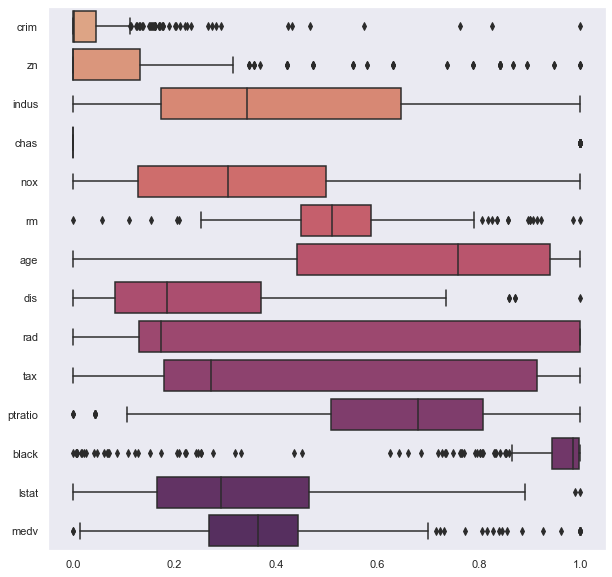

In [58]:
#View outliers for each feature
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.boxplot(data=boston_norm, orient="h", palette = 'flare')

In [59]:
#function to get outliers from all numeric features
def IQR_Outliers (X, features):
    
    Outlier_df = pd.DataFrame()
    ulimit=[]
    llimit=[]
    no_of_outliers =[]
    perc = []
    feature = []


    indices = [x for x in X.index]
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        
        feature.append(col)        
        ulimit.append(upper)
        llimit.append(lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        

        no_of_outliers.append(len(outliers))
        perc.append(round((len(outliers)*100)/len(indices),2))

        out_indexlist.extend(outliers_index)
    
    Outlier_df['feature'] = feature
    Outlier_df['no_of_outliers']= no_of_outliers 
    Outlier_df['percentage']= perc
    Outlier_df['upper_limit']= ulimit
    Outlier_df['lower_limit']= llimit
                   
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    return Outlier_df   


In [60]:
#get outliers from all numeric features
IQR_Outliers(boston_norm, boston_norm.columns)

Number of samples:  404

Number of rows with outliers:  176


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,crim,42,10.40,0.112431,-0.066091
1,zn,49,12.13,0.328947,-0.197368
2,indus,0,0.00,1.356488,-0.536474
3,chas,28,6.93,0.000000,0.000000
4,nox,0,0.00,1.056367,-0.430063
5,rm,21,5.20,0.796704,0.239893
6,age,0,0.00,1.686663,-0.305098
7,dis,5,1.24,0.798949,-0.345210
8,rad,0,0.00,2.304348,-1.173913
9,tax,0,0.00,2.016221,-0.922710


We observe that 9 features have outliers based on cutoff 1.5 IQR.

In [61]:
df = IQR_Outliers(boston_norm, boston_norm.columns)
df[df['no_of_outliers']>0]

Number of samples:  404

Number of rows with outliers:  176


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,crim,42,10.40,0.112431,-0.066091
1,zn,49,12.13,0.328947,-0.197368
3,chas,28,6.93,0.000000,0.000000
5,rm,21,5.20,0.796704,0.239893
7,dis,5,1.24,0.798949,-0.345210
10,ptratio,12,2.97,1.259309,0.057181
11,black,61,15.10,1.078304,0.863492
12,lstat,2,0.50,0.914292,-0.283624
13,medv,27,6.68,0.707778,0.005556


In [62]:
#all columns with outliers as a list
list(df[df['no_of_outliers']>0]['feature'])

['crim', 'zn', 'chas', 'rm', 'dis', 'ptratio', 'black', 'lstat', 'medv']

### Custom Transformer

We will author a custom Transformer to cap the outliers at 1.5*IQR left and right

In [63]:
from sklearn.base import BaseEstimator,TransformerMixin
class OutlierCapper(BaseEstimator,TransformerMixin):
    #def __init__(self,factor=1.5):
        #self.factor = factor
        
        
    def outlier_cap(self,X,y=None):
        print(X)
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        X.loc[(X < lower_bound)] = lower_bound 
        X.loc[(X > upper_bound)] = upper_bound 
        return pd.Series(X)
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X.apply(self.outlier_cap)
    
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [64]:
from sklearn.compose import ColumnTransformer

outlierTreatment = ColumnTransformer([
    ('outlier_capper',OutlierCapper(),['crim', 'zn', 'chas', 'rm', 'dis', 'ptratio', 'black', 'lstat', 'medv'])],remainder='passthrough')

In [65]:
data_without_outliers = pd.DataFrame(outlierTreatment.fit_transform(boston_norm),columns=boston_norm.columns)

0      0.001713
1      0.001090
2      0.003856
3      0.030658
4      0.000416
         ...   
399    0.104786
400    0.574683
401    0.000098
402    0.000160
403    0.000856
Name: crim, Length: 404, dtype: float64
0      0.000000
1      0.263158
2      0.000000
3      0.000000
4      0.221053
         ...   
399    0.000000
400    0.000000
401    0.947368
402    0.894737
403    0.315789
Name: zn, Length: 404, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
399    0.0
400    0.0
401    1.0
402    0.0
403    0.0
Name: chas, Length: 404, dtype: float64
0      0.459858
1      0.453344
2      0.461966
3      0.390113
4      0.489366
         ...   
399    0.502778
400    0.420770
401    0.835792
402    0.540717
403    0.559494
Name: rm, Length: 404, dtype: float64
0      0.375837
1      0.525937
2      0.176447
3      0.032544
4      0.515232
         ...   
399    0.099704
400    0.022259
401    0.430385
402    0.731789
403    0.458211
Name: dis, Length: 

<AxesSubplot:>

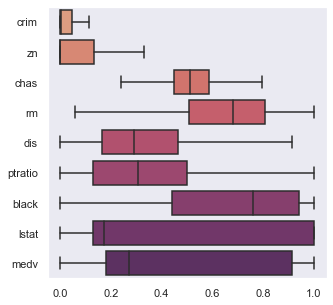

In [66]:
#View boxplot post outlier treatment
plt.figure(figsize=(5,5))
sns.set_style("dark")
df = pd.DataFrame(data = data_without_outliers, columns = ['crim', 'zn', 'chas', 'rm', 'dis', 'ptratio', 'black', 'lstat', 'medv'])
sns.boxplot(data=df, orient="h", palette = 'flare')

<AxesSubplot:>

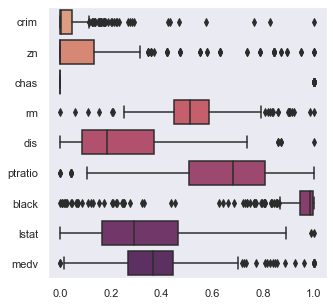

In [67]:
#Compare with earlier plot
plt.figure(figsize=(5,5))
sns.set_style("dark")
df = pd.DataFrame(data = boston_norm, columns = ['crim', 'zn', 'chas', 'rm', 'dis', 'ptratio', 'black', 'lstat', 'medv'])
sns.boxplot(data=df, orient="h", palette = 'flare')